### Naive Bees Part 1: Image Loading and Processing

This project ultimately aims to identify bees as honey bees or bumble bees. Honey bees are slender and have pointed abdomens. Bumble bees are fatter than honey bees, are hairy, and have more opaque wings. Both bees are roughly the same color. 

Being able to identify bees quickly and effectively would help researchers collect data and understand the roles of these bees in ecology and agriculture. Their pollination patterns have vast impact on ecosystems and the welfare of plants and animals. 

In the first part of the project, images of bees are loaded and processed. 

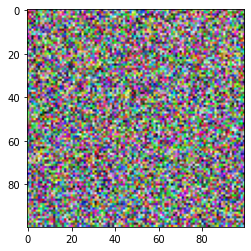

In [9]:
# Used to change filepaths
from pathlib import Path

# We set up matplotlib, pandas, and the display function
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd
import numpy as np
from PIL import Image

#create a random colorful square as a test 
test_data= np.random.beta(1,1,(100, 100, 3))

plt.imshow(test_data)

Here the image is loaded, displayed, and the dimensions are displayed. 

The image size is: (100, 100)


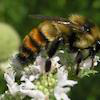

In [10]:
# open the image

file_path = 'C:/Users/Alma Chen/Documents/Data Projects/Part 1 Naïve Bees_ Image Loading and Processing/datasets/'

img = Image.open(file_path + 'bee_1.jpeg')


# Get the image size
img_size = img.size

print("The image size is: {}".format(img_size))

# Just having the image as the last line in the cell will display it in the notebook
img

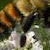

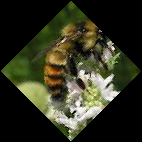

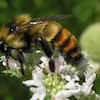

In [11]:
# Experimenting with cropping, rotating, and flipping

# Crop the image to 25, 25, 75, 75
img_cropped = img.crop((25, 25, 75, 75))
display(img_cropped)

# rotate the image by 45 degrees
img_rotated = img.rotate(45, expand = 25)
display(img_rotated)

# flip the image left to right
img_flipped = img.transpose(Image.FLIP_LEFT_RIGHT)
display(img_flipped)

Images can be displayed as a three dimensional matrix with each dimension being one of the three color channels: red, green, and blue. Now, the channels of the bee image are explored. A kernel density estimate is plotted to understand how the different color channels differ. 

Our NumPy array has the shape: (100, 100, 3)


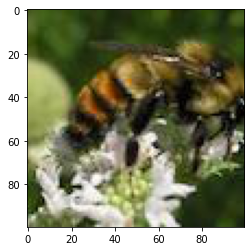

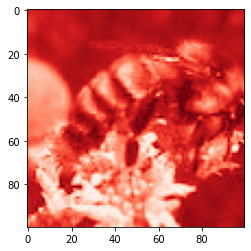

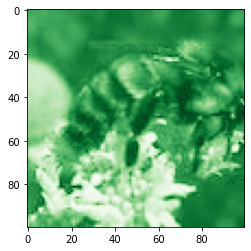

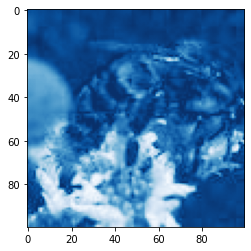

In [12]:
# Turn our image object into a NumPy array
img_data = np.array(img)

# get the shape of the resulting array
img_data_shape = img_data.shape

print("Our NumPy array has the shape: {}".format(img_data_shape))

# plot the data with `imshow` 
plt.imshow(img_data)
plt.show()

# plot the red channel
plt.imshow(img_data[:,:,0], cmap=plt.cm.Reds_r)
plt.show()

# plot the green channel
plt.imshow(img_data[:,:,1], cmap=plt.cm.Greens_r)
plt.show()

# plot the blue channel
plt.imshow(img_data[:,:,2], cmap=plt.cm.Blues_r)
plt.show()

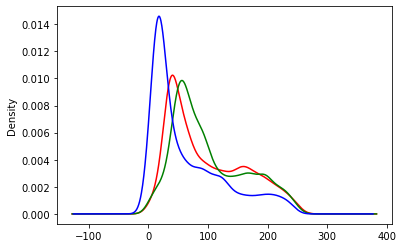

In [13]:
#Explore the color channels

def plot_kde(channel, color):
    """ Plots a kernel density estimate for the given data.
        
        `channel` must be a 2d array
        `color` must be a color string, e.g. 'r', 'g', or 'b'
    """
    data = channel.flatten()
    return pd.Series(data).plot.density(c=color)

# create the list of channels
channels = ['r', 'g', 'b']
    
def plot_rgb(image_data):
    # use enumerate to loop over colors and indexes
    for ix, color in enumerate(channels):
        plot_kde(img_data[:,:,ix], color)

    plt.show()
    
plot_rgb(img_data)

The differences between honey and bumble bees are now explored. The following is a honey bee: 

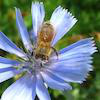

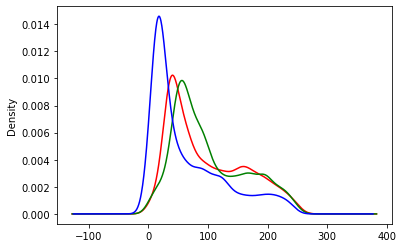

In [14]:
# load bee_12.jpg as honey
honey = Image.open('datasets/bee_12.jpeg')
# display the honey bee image
display(honey)

# NumPy array of the honey bee image data
honey_data = np.array(honey)
# plot the rgb densities for the honey bee image
plot_rgb(honey_data)

The following is a bumble bee:

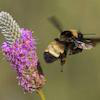

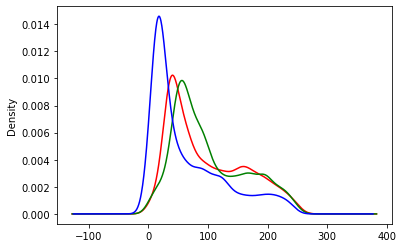

In [15]:
# load bee_3.jpeg as bumble
bumble = Image.open('datasets/bee_3.jpeg')
# display the bumble bee image
display(bumble)

# NumPy array of the bumble bee image data
bumble_data = np.array(bumble)
# plot the rgb densities for the bumble bee image
plot_rgb(bumble_data)

The honey bee image, which has a blue flower, has a strong blue peak in its rgb density graph. These graphs seem to be heavily influenced by the colors of objects in the background, which is not useful to the purpose of identifying bees. In fact, honeybees and bumblebees have similar colors. Thus, it may be beneficial to convert all the images to black and white to avoid being distracted by colors. 

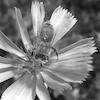

Our NumPy array has the shape: (100, 100)


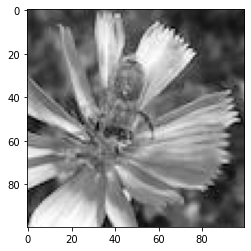

<AxesSubplot:ylabel='Density'>

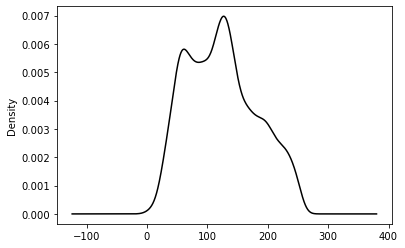

In [16]:
# convert honey to grayscale
honey_bw = honey.convert("L")
display(honey_bw)

# convert the image to a NumPy array
honey_bw_arr = np.array(honey_bw)

# get the shape of the resulting array
honey_bw_arr_shape = honey_bw_arr.shape
print("Our NumPy array has the shape: {}".format(honey_bw_arr_shape))

# plot the array using matplotlib
plt.imshow(honey_bw_arr, cmap=plt.cm.gray)
plt.show()

# plot the kde of the new black and white array
plot_kde(honey_bw_arr, 'k')

The image is flipped, clipped, and saved. The flipping is for fun. The clipping reduces the range of values of the numpy array that represents the image, which increases the contrast. 

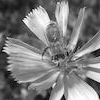

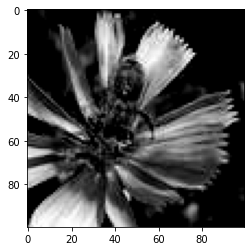

In [17]:
# flip the image left-right with transpose
honey_bw_flip = honey_bw.transpose(Image.FLIP_LEFT_RIGHT)

# show the flipped image
display(honey_bw_flip)

# save the flipped image
honey_bw_flip.save(fp=file_path + "bw_flipped.jpeg") 

# create higher contrast by reducing range

honey_hc_arr = np.maximum(honey_bw_arr, 100)
# show the higher contrast version
plt.imshow(honey_hc_arr, cmap=plt.cm.gray)

# convert the NumPy array of high contrast to an Image
honey_bw_hc = Image.fromarray(honey_hc_arr)
# save the high contrast version

honey_bw_hc.save(fp=file_path + "bw_hc.jpeg")

An image processing pipeline is created. This pipeline: 
    <li>loads images with <code>Image.open</code>
    <li>converts image to grayscale
    <li>saves the image
    <li>rotates, crops, and zooms on the image

In [18]:
image_paths = ['datasets/bee_1.jpeg', 'datasets/bee_12.jpeg', 'datasets/bee_2.jpeg', 'datasets/bee_3.jpeg']

def process_image(path):
    img = Image.open(path)

    # create paths to save files to
    bw_path = file_path + "bw_{}.jpeg".format(path.stem)
    rcz_path = file_path + "rcz_{}.jpeg".format(path.stem)

    print("Creating grayscale version of {} and saving to {}.".format(path, bw_path))
    bw = img.convert("L")
    bw.save(fp=bw_path)

    print("Creating rotated, cropped, and zoomed version of {} and saving to {}.".format(path, rcz_path))
    rcz = img.rotate(45).crop((25, 25, 75, 75)).resize((100, 100))
    rcz.save(fp=rcz_path)

# for loop over image paths
for img_path in image_paths:
    process_image(Path(img_path))

Creating grayscale version of datasets\bee_1.jpeg and saving to C:/Users/Alma Chen/Documents/Data Projects/Part 1 Naïve Bees_ Image Loading and Processing/datasets/bw_bee_1.jpeg.
Creating rotated, cropped, and zoomed version of datasets\bee_1.jpeg and saving to C:/Users/Alma Chen/Documents/Data Projects/Part 1 Naïve Bees_ Image Loading and Processing/datasets/rcz_bee_1.jpeg.
Creating grayscale version of datasets\bee_12.jpeg and saving to C:/Users/Alma Chen/Documents/Data Projects/Part 1 Naïve Bees_ Image Loading and Processing/datasets/bw_bee_12.jpeg.
Creating rotated, cropped, and zoomed version of datasets\bee_12.jpeg and saving to C:/Users/Alma Chen/Documents/Data Projects/Part 1 Naïve Bees_ Image Loading and Processing/datasets/rcz_bee_12.jpeg.
Creating grayscale version of datasets\bee_2.jpeg and saving to C:/Users/Alma Chen/Documents/Data Projects/Part 1 Naïve Bees_ Image Loading and Processing/datasets/bw_bee_2.jpeg.
Creating rotated, cropped, and zoomed version of datasets\bee